<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> IMT1001-2023: Introduccion a la Ingenieria Matematica</h1></center>
<center><h1 style="color:#173F8A;"> Modulo Analisis Numerico</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<center><h1 style="color:#0176DE;"> Template proyecto elementos finitos</h3></center>
<hr style="border:2px solid #808080"> </hr>

In [7]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Cargar malla del laberinto

In [3]:
maze_mesh = np.load("maze_tri.npz")
Coordinates = maze_mesh["Coordinates"]
Elements    = maze_mesh["Elements"]
Dir_in      = maze_mesh["Dirichlet_in"]
Dir_out     = maze_mesh["Dirichlet_out"]

## Grafica de la malla con condicion de frontera

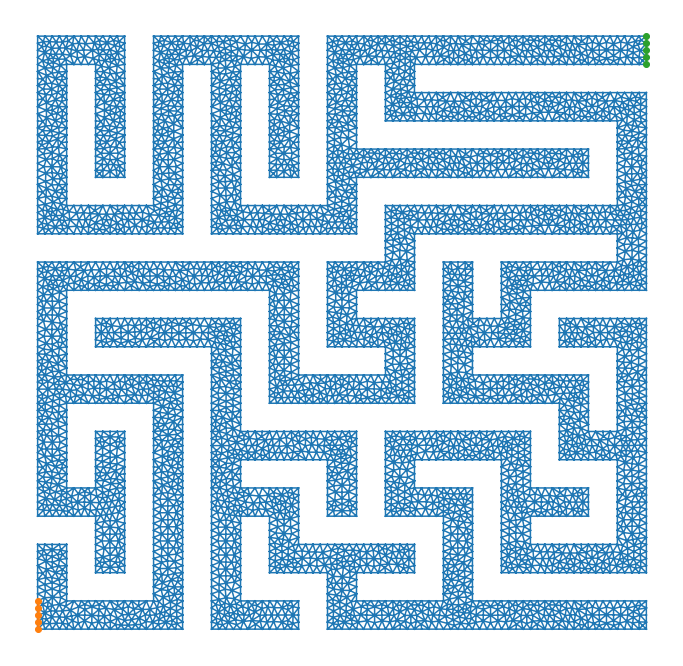

In [6]:
Th = tri.Triangulation(Coordinates[:,0],Coordinates[:,1], Elements)
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.triplot(Th)
for i in Dir_in:
    ax.plot(Coordinates[i,0], Coordinates[i,1],'o',color='C01')
for i in Dir_out:
    ax.plot(Coordinates[i,0], Coordinates[i,1],'o', color='C02')
plt.axis('off')
plt.show()

In [168]:
def fem2d_Poisson_LagrangeP1(Coordinate,Elements, f):
    NN = Coordinates.shape[0]; NE = Elements.shape[0]
    A = np.zeros((NN,NN), dtype=np.float64); b = np.zeros(NN, dtype=np.float64)
    for j in range(NE):
        # Calcular matrices locales
        AK = ...
        bK = ...
        # Ensamblaje local
        dofn = Elements[j,:]
        b[dofn] = b[dofn] + bK
        for i in range(3):
            for k in range(3):
                A[dofn[i], dofn[k]] +=  AK[i,k]
    return A, b

def fem2d_solver_LagrangeP1(Coordinates, Elements, Dir_in=None , Dir_out=None, f=None, u_in=None, u_out=None):
    NN = Coordinates.shape[0]; NE = Elements.shape[0]
    
    A, b = fem2d_Poisson_LagrangeP1(Coordinates, Elements, f)
    uh = np.zeros(NN, dtype=np.float64)
    # imponer condiciones de Dirichlet
    ...
    # Resolver el sistema linea;
    ...
    return uh

def compute_grad(uh, Coordinates, Elements):
    NN = Coordinates.shape[0]; NE = Elements.shape[0]
    graduh = np.zeros((NN,2),dtype=np.float64)
    # Calcular gradiente por elemento
    for j in range(NE):
        ...
    return graduh

## Resolver el problema del laberinto

In [ ]:
# 2D FEM for Poisson equation
# -u_{xx}-u_{yy}  = f in \Omega, 
# u = 0 sobre \partial\Omega_{in},
# u = 1 sobre \partial\Omega_{out}.

# Problema
u_in = lambda x: 0*x[0] + 0*x[1]
u_out = lambda x: 1.0+0*x[0] + 0*x[1]
f  = lambda x: 0

# Solucion
uh = fem2d_solver_LagrangeP1(Coordinates, Elements, Dir_in = Dir_in,Dir_out = Dir_out, f=f, u_in=u_in, u_out=u_out)
graduh = compute_grad(uh, Coordinates, Elements)

## Grafica en 3d de la solucion $u_h$

In [ ]:
Th = tri.Triangulation(Coordinates[:,0],Coordinates[:,1], Elements)
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(Th, uh, cmap=cm.jet, linewidth=0.2)
plt.axis('off')
plt.show()

## Grafica del gradiente $\nabla u_h$, solucion del laberinto

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax.tricontourf(Th, np.linalg.norm(graduh, axis=1), cmap=cm.viridis, linewidth=0.2)
plt.axis('off')
plt.show()

## Ejemplo de solucion

<img src="maze_sol.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />